In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet import ResNet50
from keras.applications.inception_v3 import InceptionV3

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
traning_set=train_datagen.flow_from_directory('Dataset/train',
                                            target_size=(224,224),
                                            batch_size=36,
                                            class_mode='categorical')
test_set=test_datagen.flow_from_directory('Dataset/val',
                                        target_size=(224,224),
                                        batch_size=10,
                                        class_mode='categorical')


Found 72 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [5]:
Image_size=[224,224]

In [6]:
traning_set.class_indices,test_set.class_indices

({'rural': 0, 'urban': 1}, {'rural': 0, 'urban': 1})

In [7]:
vgg16=VGG16(input_shape=Image_size+[3],weights='imagenet',include_top=False)

In [8]:
for layers in vgg16.layers:
    layers.trainable=False

In [9]:
vgg16_flatten=keras.layers.Flatten()(vgg16.output)

In [10]:
vgg16_prediction=keras.layers.Dense(2,activation='softmax')(vgg16_flatten)

In [11]:
vgg16_model=Model(inputs=vgg16.input,outputs=vgg16_prediction)

In [12]:
vgg16_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
vgg16_output=vgg16_model.fit(traning_set,epochs=10,validation_data=test_set)

Epoch 1/10


2/2 [==============================] - 34s 16s/step - loss: 1.7595 - accuracy: 0.4167 - val_loss: 1.1831 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 24s 14s/step - loss: 0.6179 - accuracy: 0.7500 - val_loss: 0.4952 - val_accuracy: 0.7500
Epoch 3/10
2/2 [==============================] - 24s 15s/step - loss: 0.6088 - accuracy: 0.6389 - val_loss: 0.5119 - val_accuracy: 0.7500
Epoch 4/10
2/2 [==============================] - 27s 16s/step - loss: 0.3559 - accuracy: 0.8194 - val_loss: 0.0793 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 29s 18s/step - loss: 0.1079 - accuracy: 0.9444 - val_loss: 0.0601 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 30s 18s/step - loss: 0.1488 - accuracy: 0.9444 - val_loss: 0.1015 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 29s 17s/step - loss: 0.2818 - accuracy: 0.9167 - val_loss: 0.0690 - val_accuracy: 1.0000
Epoch 8/10
2/2 [=========

In [81]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
vgg16_model.evaluate(test_set)

2/2 [==============================] - 5s 2s/step - loss: 0.0262 - accuracy: 1.0000


[0.026215553283691406, 1.0]

In [37]:
import numpy as np
from tensorflow.keras.preprocessing import image
rural=[]
for i in range(0,50,5):
    # Load and preprocess the image
    if i in [15,40]:
        img_path = f'Dataset/val/rural/rural{i}.jpg'
    else:
        img_path = f'Dataset/val/rural/rural{i}.jpeg'# Replace with the path to your image
                    
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Rescale the image

    # Make the prediction
    prediction = vgg16_model.predict(x)

    # Get the predicted class
    predicted_class = np.argmax(prediction)

    # Get the class labels from the train generator
    class_labels = list(traning_set.class_indices.keys())

    # Print the predicted class label
    rural.append(class_labels[predicted_class])

1/1 [==============================] - 0s 247ms/step


In [38]:
rural                                             

['rural',
 'rural',
 'rural',
 'rural',
 'rural',
 'rural',
 'rural',
 'rural',
 'rural',
 'rural']

In [34]:
import numpy as np
from tensorflow.keras.preprocessing import image
import glob
urban=[]
for img_path in glob.glob('Dataset/val/urban/*'):

    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Rescale the image

        # Make the prediction
    prediction = vgg16_model.predict(x)

        # Get the predicted class
    predicted_class = np.argmax(prediction)

        # Get the class labels from the train generator
    class_labels = list(traning_set.class_indices.keys())

        # Print the predicted class label
    urban.append(class_labels[predicted_class])

1/1 [==============================] - 0s 264ms/step


In [35]:
urban

['urban',
 'urban',
 'urban',
 'urban',
 'urban',
 'urban',
 'urban',
 'urban',
 'urban',
 'urban']

In [42]:
def plot_graph(history):
    fig,ax=plt.subplots(1,2,figsize=(8,4))
    ax[0].plot(history.history["accuracy"],label='Accuracy')
    ax[0].plot(history.history["val_accuracy"],label='Test_accuracy')
    ax[0].legend()
    ax[0].grid(True)
#     plt.show()
    
    ax[1].plot(history.history["loss"],label='loss')
    ax[1].plot(history.history["val_loss"],label='Test_loss')
    ax[1].legend()
    ax[1].grid(True)
    plt.tight_layout()
    plt.show()

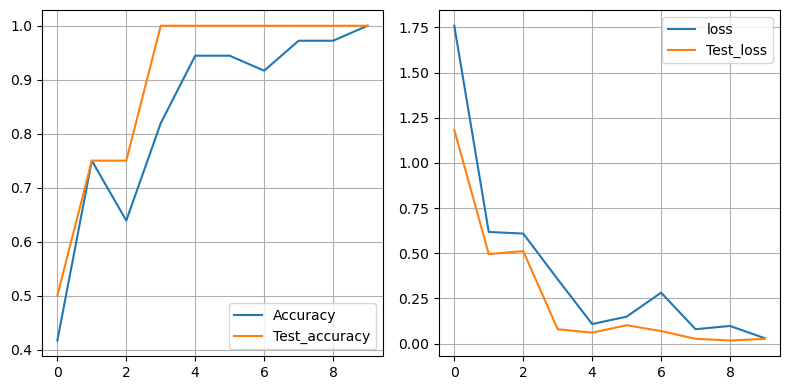

In [44]:
plot_graph(vgg16_output)

In [45]:
vgg19=VGG19(input_shape=Image_size+[3],weights='imagenet',include_top=False)

In [47]:
for layers in vgg19.layers:
    layers.trainable=False

In [48]:
vgg19_flatten=keras.layers.Flatten()(vgg19.output)

In [49]:
vgg19_output_layer=keras.layers.Dense(2,activation='softmax')(vgg19_flatten)

In [50]:
vgg19_model=Model(inputs=vgg19.input,outputs=vgg19_output_layer)

In [51]:
vgg19_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
vgg19_ouput=vgg19_model.fit(traning_set,epochs=5,validation_data=test_set)

Epoch 1/5
2/2 [==============================] - 32s 18s/step - loss: 1.7504 - accuracy: 0.5556 - val_loss: 1.7268 - val_accuracy: 0.5000
Epoch 2/5
2/2 [==============================] - 28s 17s/step - loss: 1.0156 - accuracy: 0.7361 - val_loss: 0.9929 - val_accuracy: 0.5000
Epoch 3/5
2/2 [==============================] - 28s 17s/step - loss: 1.0154 - accuracy: 0.5694 - val_loss: 0.3199 - val_accuracy: 0.9000
Epoch 4/5
2/2 [==============================] - 29s 18s/step - loss: 0.3355 - accuracy: 0.8333 - val_loss: 0.2174 - val_accuracy: 0.8500
Epoch 5/5
2/2 [==============================] - 34s 21s/step - loss: 0.3291 - accuracy: 0.8472 - val_loss: 0.3080 - val_accuracy: 0.8000


In [54]:
vgg19_model.evaluate(test_set)

2/2 [==============================] - 6s 3s/step - loss: 0.3080 - accuracy: 0.8000


[0.3079504072666168, 0.800000011920929]

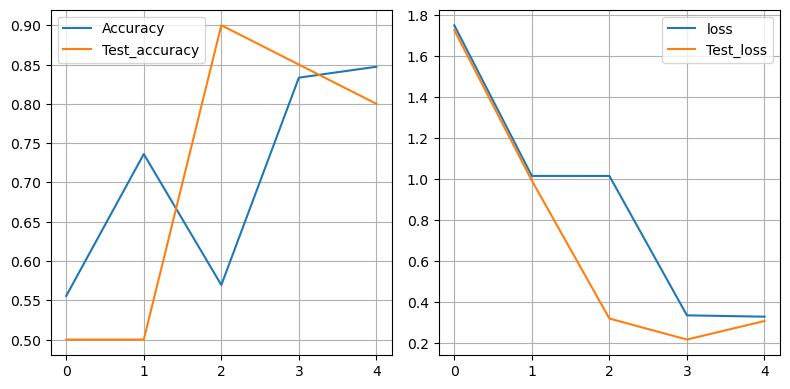

In [55]:
plot_graph(vgg19_ouput)